## A4_3 : Multidimensional Scaling
                            Gauri Vinod Nair
                            V01110160

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

In [2]:
# Step 1: Load and Clean Data
df = pd.read_csv('icecream.csv')
df

,Brand,Price,Availability,Taste,Flavour,Consistency,Shelflife
0,Amul,4,5,4,3,4,3
1,Nandini,3,2,3,2,3,3
2,Vadilal,2,2,4,3,4,4
3,Vijaya,3,1,3,5,3,4
4,Dodla,3,3,3,4,4,3
5,Hatson,2,2,4,4,3,4
6,Arun,2,3,4,3,4,4
7,Joy,4,1,2,3,3,3
8,Kwality,3,4,5,5,4,4
9,KVAFSU,4,2,3,2,3,3


In [3]:
# Check for missing values and handle if necessary
print(df.isnull().sum())

Brand           0
Price           0
Availability    0
Taste           0
Flavour         0
Consistency     0
Shelflife       0
dtype: int64


In [4]:
# Step 2: EDA and Data Preparation
# Describe dataset
print(df.describe())

           Price  Availability      Taste    Flavour  Consistency  Shelflife
count  10.000000     10.000000  10.000000  10.000000    10.000000  10.000000
mean    3.000000      2.500000   3.500000   3.400000     3.500000   3.500000
std     0.816497      1.269296   0.849837   1.074968     0.527046   0.527046
min     2.000000      1.000000   2.000000   2.000000     3.000000   3.000000
25%     2.250000      2.000000   3.000000   3.000000     3.000000   3.000000
50%     3.000000      2.000000   3.500000   3.000000     3.500000   3.500000
75%     3.750000      3.000000   4.000000   4.000000     4.000000   4.000000
max     4.000000      5.000000   5.000000   5.000000     4.000000   4.000000


C:\Users\gauri\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


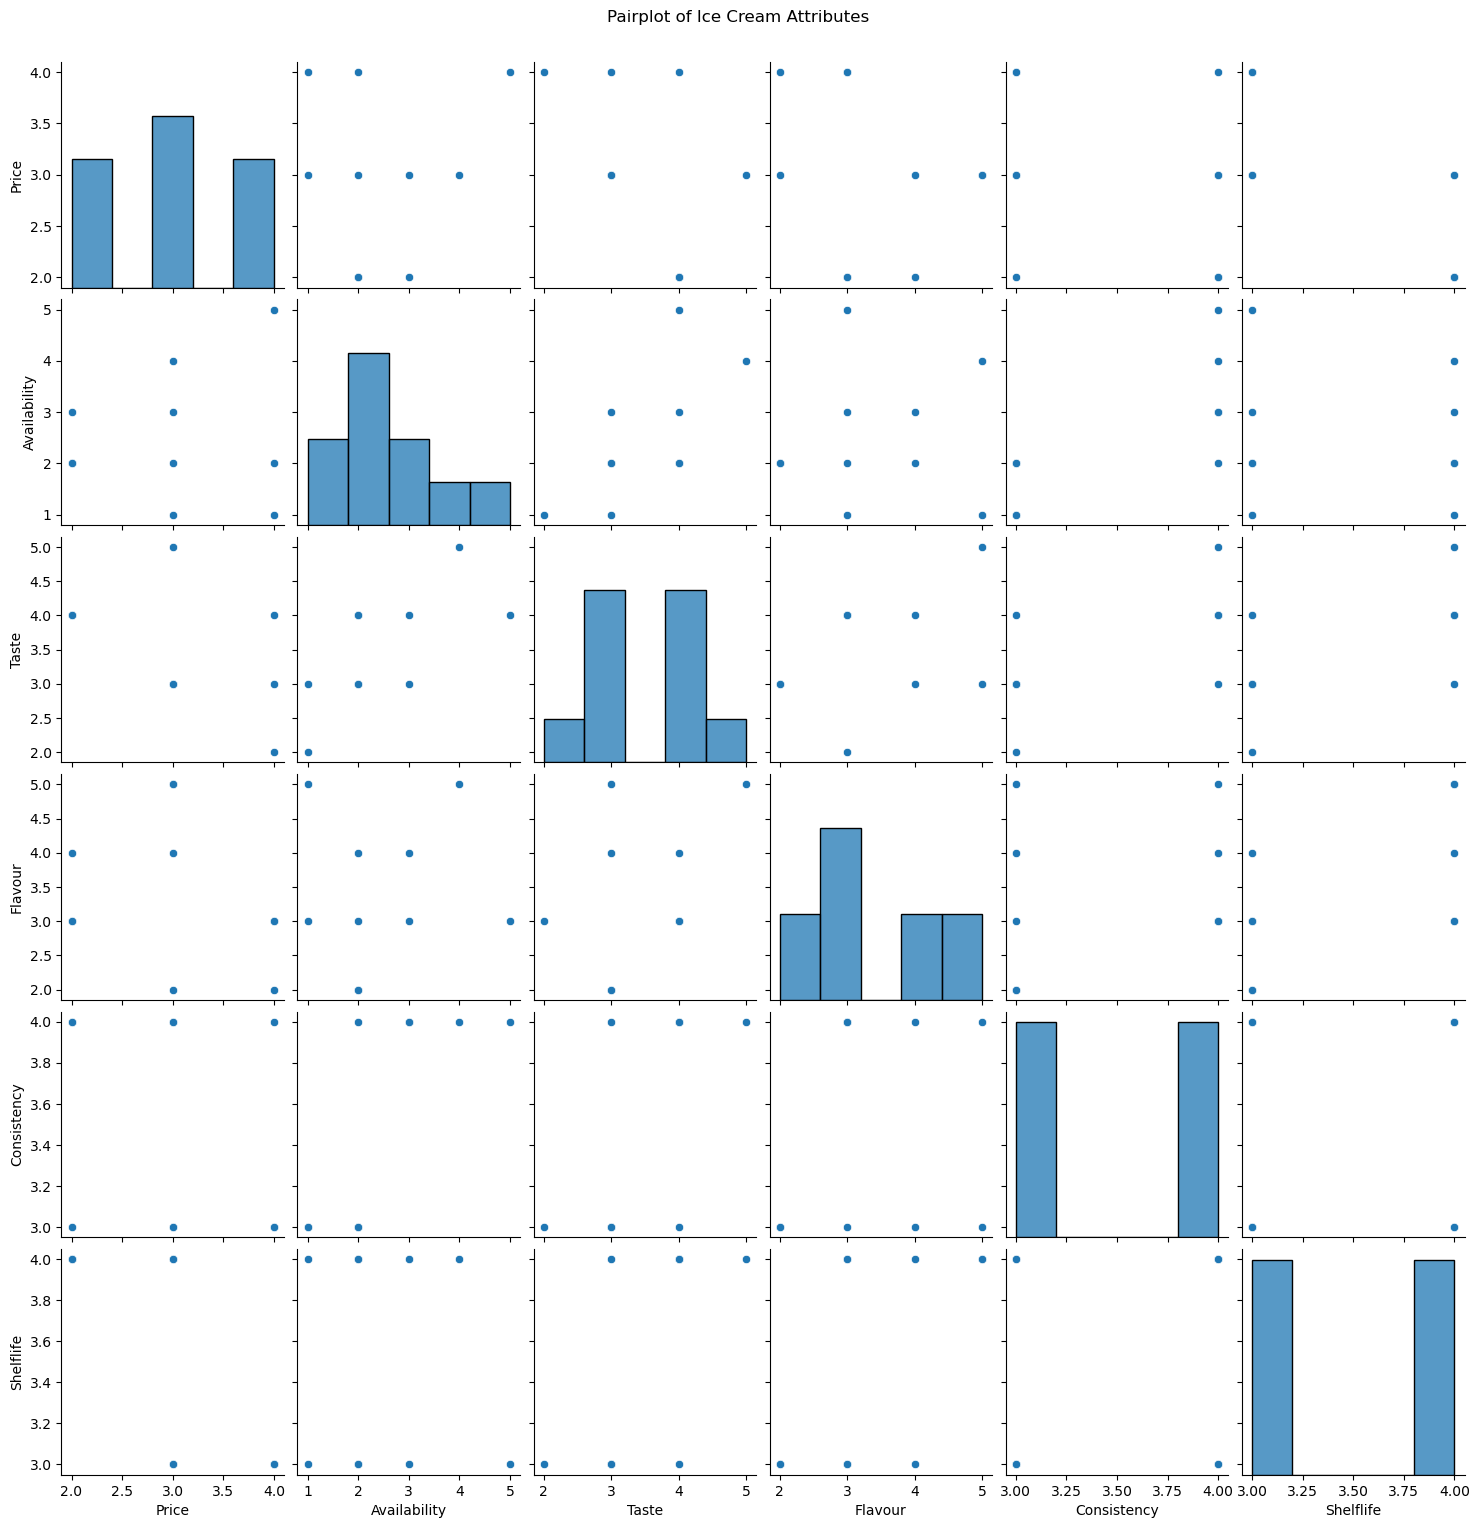

In [5]:
# Step 2: Pairplot for Distributions and Relationships
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.suptitle('Pairplot of Ice Cream Attributes', y=1.02)
plt.show()

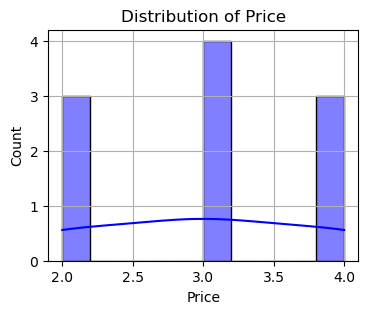

In [6]:
# Step 4: Individual Attribute Distributions (example with Price)
plt.figure(figsize=(4, 3))
sns.histplot(df['Price'], bins=10, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

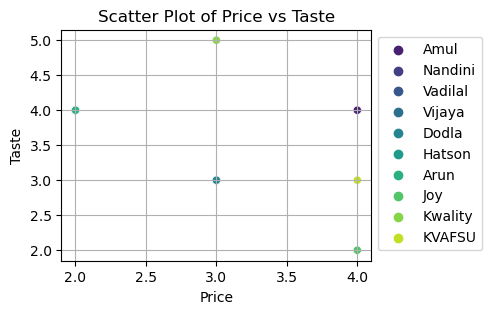

In [7]:
# Step 5: Scatter Plot (example with Price vs Taste)
plt.figure(figsize=(4, 3))
sns.scatterplot(data=df, x='Price', y='Taste', hue='Brand', palette='viridis')
plt.title('Scatter Plot of Price vs Taste')
plt.xlabel('Price')
plt.ylabel('Taste')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [8]:
# Step 3: Standardize the Data (if necessary)
# Example using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Brand']))

In [9]:
# Step 4: Apply Multidimensional Scaling (MDS)
# Calculate dissimilarities
similarities = euclidean_distances(df_scaled)

In [10]:
# MDS fitting
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
positions = mds.fit_transform(similarities)

C:\Users\gauri\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


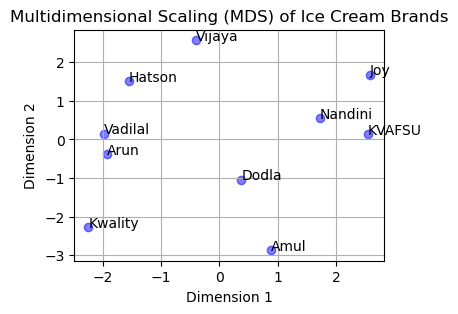

In [11]:
# Step 5: Visualize MDS Results
plt.figure(figsize=(4, 3))
plt.scatter(positions[:, 0], positions[:, 1], c='blue', alpha=0.5)
for i, txt in enumerate(df['Brand']):
    plt.annotate(txt, (positions[i, 0], positions[i, 1]))
plt.title('Multidimensional Scaling (MDS) of Ice Cream Brands')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()